<a href="https://colab.research.google.com/github/Heramb0x1/Neural_Network_Model_Using_TensorFlow-KerasAPI-/blob/main/ANN_Health_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Numerical Python (NumPy) : For Mathematical Operations, statistical Operation

In [ ]:
# pandas to read files of different format & for pre-processing

In [ ]:
 # matplotlib for visualization

In [ ]:
# Keras Packages
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# For Regression model optimizers Root Mean Square Propogation (RMSprop.)
from tensorflow.keras.optimizers import RMSprop


In [ ]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv")

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.isnull().sum()
#This code is for checking is there any value empty or not feeded in

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])
# Label Encoder is used to normalize labels
# if u've got ordinal data & there is relational :> use label encoder

In [ ]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])

In [ ]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges,smoler
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


<Axes: >

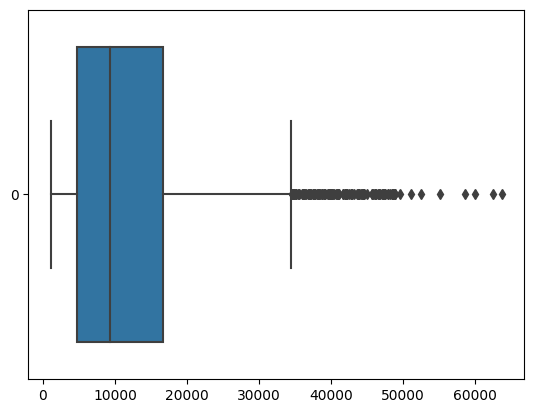

In [ ]:
import seaborn as sns
sns.boxplot(insurance_data['charges'], orient = 'h' )

In [ ]:
X = insurance_data.drop(['charges'], axis = 1)
Y= insurance_data['charges']

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges,smoler
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


### Train And Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size = 0.2, random_state = 3)

####ANN Regressor Model

In [ ]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 256, activation = 'relu'))
  # Hidden Layer - II
  model.add(Dense(units = 512, activation = 'relu'))
  # Hidden Layer - III
  model.add(Dense(units = 1))
  #Optimizer
  model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop',
                metrics = ['mean_squared_error',
                           'mean_absolute_error'])
  return model

In [ ]:
 model = build_model()


In [ ]:
model.fit(x_train, y_train, epochs = 600, batch_size = 30,
          validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 1s 9ms/step - loss: 297352512.0000 - mean_squared_error: 297352512.0000 - mean_absolute_error: 12081.1943 - val_loss: 153889568.0000 - val_mean_squared_error: 153889568.0000 - val_mean_absolute_error: 7288.9502
Epoch 2/600
29/29 [==============================] - 0s 4ms/step - loss: 156817856.0000 - mean_squared_error: 156817856.0000 - mean_absolute_error: 8429.9785 - val_loss: 101752832.0000 - val_mean_squared_error: 101752832.0000 - val_mean_absolute_error: 8293.7354
Epoch 3/600
29/29 [==============================] - 0s 4ms/step - loss: 135240304.0000 - mean_squared_error: 135240304.0000 - mean_absolute_error: 9416.6104 - val_loss: 100020088.0000 - val_mean_squared_error: 100020088.0000 - val_mean_absolute_error: 7995.4697
Epoch 4/600
29/29 [==============================] - 0s 3ms/step - loss: 134818240.0000 - mean_squared_error: 134818240.0000 - mean_absolute_error: 9352.6074 - val_loss: 100328208.0000 - val_mean_squared_error:

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1024      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 166145 (649.00 KB)
Trainable params: 166145 (649.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
